<a href="https://colab.research.google.com/github/PSivaMallikarjun/AI-ML-multiple-linear-regression-to-predict-house-prices/blob/main/House_Price_Prediction_based_on_livelihood_and_naturalresources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learn Artificial Intelligence by Building  practical Machine Learning and Deep Learning Projects with Python**

**The Project involving multiple linear regression to predict house prices. Do you need help with coding the model, data preprocessing, or explaining the concept in detail**


1. It predicts a target variable (house price) based on multiple independent variables (features like number of bedrooms, location, square footage, etc.).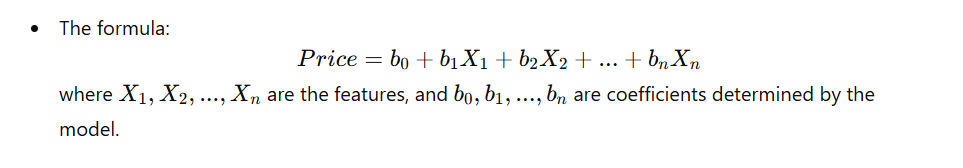

2. Dataset Preparation
We'll use a dataset (e.g., from Kaggle or scikit-learn).
Features may include square footage, number of bedrooms, location, etc.
Preprocessing: Handling missing values, encoding categorical data, feature scaling.

3. Model Implementation (Python Code in Sklearn)
Import necessary libraries.
Load and preprocess the dataset.
Split into training and testing sets.
Train the model using LinearRegression() from sklearn.
Evaluate using RMSE and R² score.

Here's a complete Python script to predict house prices using Multiple Linear Regression in scikit-learn. 🚀

Steps Covered:
✅ Load dataset (You can use your dataset or a sample one).
✅ Preprocess data (handle missing values, encode categorical features).
✅ Train the model using LinearRegression.
✅ Evaluate the model (R² Score, RMSE).

   square_feet  num_bedrooms  num_bathrooms  location  livelihood_index  \
0         1360             1              3  Suburban          0.841624   
1         4272             1              2  Downtown          0.748587   
2         3592             3              2  Downtown          0.808924   
3          966             5              2     Rural          0.934452   
4         4926             4              4  Downtown          0.785305   

   natural_resources_index  future_growth_potential  crime_rate  \
0                 0.503814                 0.539714   18.725572   
1                 0.262020                 0.489173   16.722620   
2                 0.354428                 0.976492   14.246978   
3                 0.618758                 0.690396   14.572206   
4                 0.714964                 0.543094    9.772607   

   school_rating         price  
0              2  4.904321e+05  
1              7  1.415734e+06  
2              6  1.247208e+06  
3             

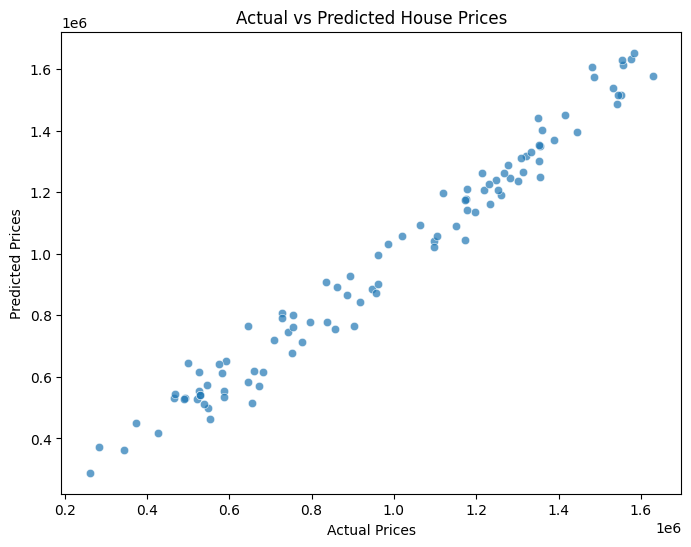

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("house_prices_dataset.csv")

# Display dataset info
print(df.head())
print(df.info())

# Selecting features (X) and target variable (y)
X = df[['square_feet', 'num_bedrooms', 'num_bathrooms', 'location',
        'livelihood_index', 'natural_resources_index', 'future_growth_potential']]
y = df['price']

# Preprocessing: Handling categorical data (OneHotEncoding for 'location')
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ['square_feet', 'num_bedrooms', 'num_bathrooms',
                               'livelihood_index', 'natural_resources_index', 'future_growth_potential']),
    ("cat", OneHotEncoder(handle_unknown='ignore'), ['location'])
])

# Create a pipeline with preprocessing and regression model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Splitting dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Feature Importance Analysis
feature_names = preprocessor.get_feature_names_out()
coefficients = model.named_steps["regressor"].coef_
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
